In [ ]:
# keras imports for the dataset and building our neural network
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Resizing, Rescaling, RandomFlip, RandomRotation
from keras.utils import np_utils
import tensorflow as tf
import tensorflow_datasets as tfds
import os
from keras import regularizers
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
# tf.test.gpu_device_name()

In [ ]:
# use_tpu = True #@param {type:"boolean"}

# if use_tpu:
#     assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

# if 'COLAB_TPU_ADDR' in os.environ:
#   TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
# else:
#   TF_MASTER=''
#   print("oops")

In [ ]:
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
# tf.config.experimental_connect_to_cluster(resolver)
# tf.tpu.experimental.initialize_tpu_system(resolver)
# strategy = tf.distribute.TPUStrategy(resolver)

Splitting Dataset 

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'UcMerced',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
    shuffle_files= True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/uc_merced/2.0.0.incompleteKUFUL8/uc_merced-train.tfrecord*...:   0%|      …

Dataset uc_merced downloaded and prepared to /root/tensorflow_datasets/uc_merced/2.0.0. Subsequent calls will reuse this data.


In [ ]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

21


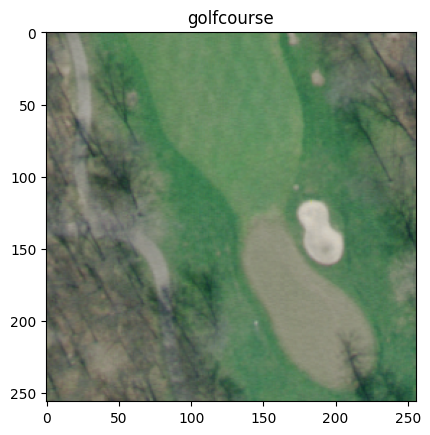

In [ ]:
get_label_name = metadata.features['label'].int2str
for example in train_ds.take(10):
  image = example[0]
  label = example[1]
  _ = plt.imshow(image)
  _ = plt.title(get_label_name(label))

# Rescaling and Resizing the image
Images resized to 128x128

In [ ]:
IMG_SIZE = 128

resize_and_rescale = tf.keras.Sequential([
  Resizing(IMG_SIZE, IMG_SIZE),
  Rescaling(1./255)
])

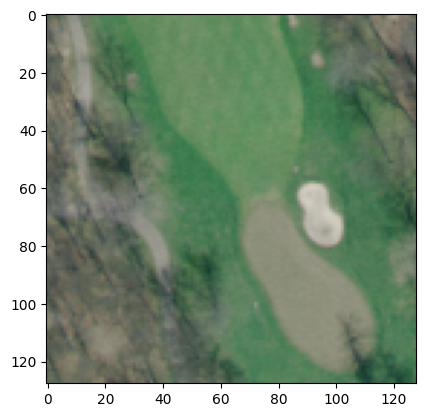

In [ ]:
result = resize_and_rescale(image)
plt.imshow(result)

# Image Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation((-1,1),interpolation = "nearest"),
])


<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


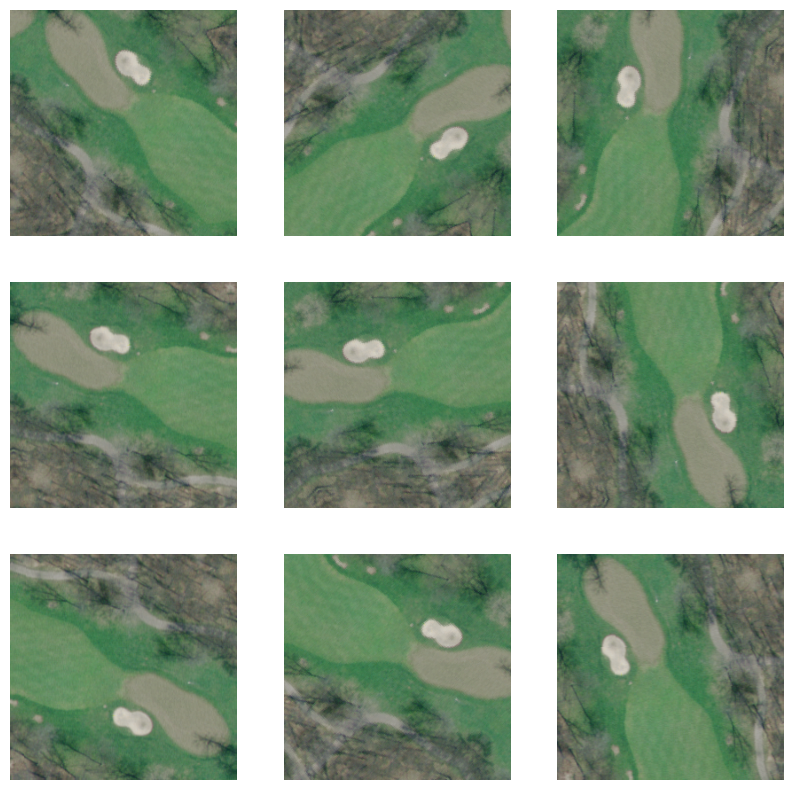

In [ ]:
plt.figure(figsize=(10, 10))

# Add the image to a batch.
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3, 3, i + 1)
  print(type(augmented_image))
  plt.imshow((augmented_image[0]*-255).numpy().astype(np.uint8))
  #plt.imshow(augmented_image[0])

  plt.axis("off")

In [ ]:
X_train = np.zeros((6720,IMG_SIZE,IMG_SIZE,3),dtype = float)
print(X_train.shape)
y_train = np.zeros((6720,),dtype = float)


(6720, 128, 128, 3)


In [ ]:
i=0
for example in train_ds:
  image = example[0]
  image = resize_and_rescale(image)
  X_train[i] = image.numpy()
  y_train[i] = example[1]
  i+=1

In [ ]:
print(i)

1680


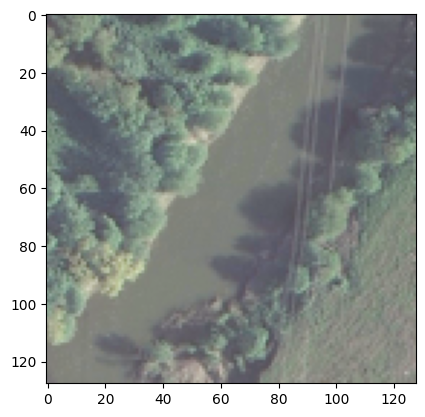

In [ ]:
plt.imshow(X_train[160])

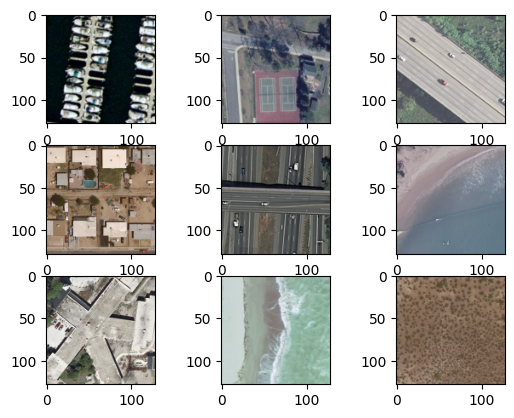

In [ ]:
for k in range(9):
  ax = plt.subplot(3, 3, k + 1)
  plt.imshow(X_train[k])

In [ ]:
for j in range(int(3)):
  print(j)
  for example in train_ds:
    image = example[0]
    image = resize_and_rescale(image)
    image = tf.cast(tf.expand_dims(image, 0), tf.float32)
    augmented_image = data_augmentation(image)
    # print(augmented_image.numpy()[0])
    #print(augmented_image.numpy()[0].shape)
    #X_train = np.append(X_train,np.zeros((6720,256,256,3),float))
    X_train[i] = np.array(augmented_image.numpy()[0])
    y_train[i] = example[1]
    i+=1
    if (i%500 == 0) :
      print(i)
print(i)


0
2000
2500
3000
1
3500
4000
4500
5000
2
5500
6000
6500
6720


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(y_train[6719])

(6720, 128, 128, 3)
(6720,)
4.0


In [ ]:
_LABELS = [
    "agricultural",
    "airplane",
    "baseballdiamond",
    "beach",
    "buildings",
    "chaparral",
    "denseresidential",
    "forest",
    "freeway",
    "golfcourse",
    "harbor",
    "intersection",
    "mediumresidential",
    "mobilehomepark",
    "overpass",
    "parkinglot",
    "river",
    "runway",
    "sparseresidential",
    "storagetanks",
    "tenniscourt",
]

river
mediumresidential
beach
intersection
freeway
forest
chaparral
mediumresidential
baseballdiamond


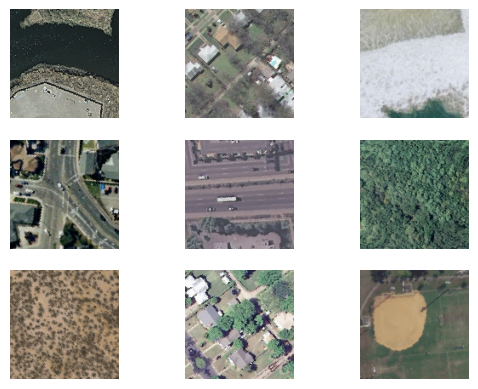

In [ ]:
for l in range(9):
  ax = plt.subplot(3, 3, l + 1)
  plt.imshow((X_train[l+6000]*255).astype(np.uint8))
  #plt.imshow(augmented_image[0])
  plt.axis("off")
  ax.set_title(_LABELS[int(y_train[l + 6000])])
  

In [ ]:
n_classes = 21
Y_train = np.array([],dtype = float)

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (6720,)
Shape after one-hot encoding:  (6720, 21)


# **Same thing done for val and test datasets**

In [ ]:
X_val = np.zeros((210,IMG_SIZE,IMG_SIZE,3),dtype = float)
y_val = np.array([],dtype = float)

X_test = np.zeros((210,IMG_SIZE,IMG_SIZE,3),dtype = float)
y_test = np.array([],dtype = float)

In [ ]:
vali = 0
for example in val_ds:
  image = example[0]
  image = resize_and_rescale(image)
  X_val[vali] = image.numpy()
  y_val = np.append(y_val,0)
  y_val[vali] = example[1]
  vali += 1

In [ ]:
testi = 0
for example in test_ds:
  image = example[0]
  image = resize_and_rescale(image)
  X_test[testi] = image.numpy()
  y_test = np.append(y_test,0)
  y_test[testi] = example[1]
  testi += 1

In [ ]:
Y_val = np_utils.to_categorical(y_val, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

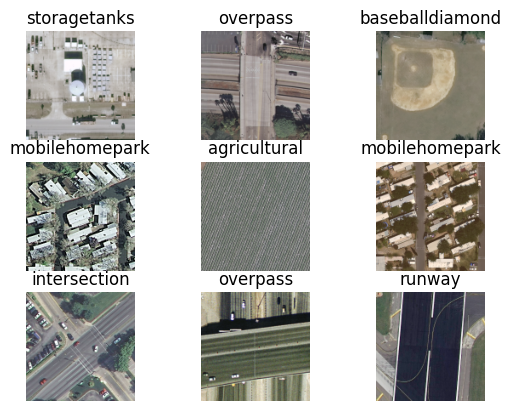

In [ ]:
for l in range(16):
  ax = plt.subplot(4, 4, l + 1)
  plt.imshow((X_test[l+69]*255).astype(np.uint8))
  #plt.imshow(augmented_image[0])
  plt.axis("off")
  ax.set_title(_LABELS[int(np.argmax(Y_test[l+69]))])

In [ ]:
# # Select the labels you want to keep
# selected_labels = ['agricultural', 'forest']

# ds_filtered = ds.filter(lambda x: x['label'] in selected_labels)

In [ ]:
def get_model():
  # building a linear stack of layers with the sequential model
  model = Sequential()

  # convolutional layer
  model.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), padding='valid', activation='elu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
  #model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
  # convolutional layer

  model.add(Conv2D(128, kernel_size=(3,3), strides=(3,1), padding='valid', activation='elu'))
  model.add(MaxPool2D(pool_size=(4,4)))
  model.add(Dropout(0.3))

  model.add(Conv2D(128, kernel_size=(3,3), strides=(1,3), padding='valid', activation='elu'))
  model.add(MaxPool2D(pool_size=(4,4)))
  model.add(Dropout(0.3))


  # flatten output of conv
  model.add(Flatten())

  # hidden layer
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(100, activation='relu', kernel_regularizer = regularizers.L1L2(l1=0.01, l2=0.01)))
  model.add(Dropout(0.3))
  # output layer
  model.add(Dense(21, activation='softmax'))
  return model




In [ ]:
# compiling the sequential model
model = get_model()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 64)      4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 41, 122, 128)      73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 30, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 30, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 10, 128)        147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 128)        0         
 2D)                                                  

In [ ]:
# training the model for 10 epochs
history = model.fit(X_train, Y_train, epochs=100, validation_data = (X_val,Y_val))

Epoch 1/100
210/210 [==============================] - 23s 52ms/step - loss: 7.7514 - accuracy: 0.1414 - val_loss: 2.8450 - val_accuracy: 0.2905
Epoch 2/100
210/210 [==============================] - 11s 50ms/step - loss: 2.6455 - accuracy: 0.3232 - val_loss: 2.2644 - val_accuracy: 0.3667
Epoch 3/100
210/210 [==============================] - 11s 51ms/step - loss: 2.3308 - accuracy: 0.4060 - val_loss: 2.1520 - val_accuracy: 0.4476
Epoch 4/100
210/210 [==============================] - 11s 51ms/step - loss: 2.2105 - accuracy: 0.4524 - val_loss: 1.8758 - val_accuracy: 0.5762
Epoch 5/100
210/210 [==============================] - 11s 52ms/step - loss: 2.0671 - accuracy: 0.4976 - val_loss: 1.8490 - val_accuracy: 0.5810
Epoch 6/100
210/210 [==============================] - 11s 52ms/step - loss: 1.9605 - accuracy: 0.5308 - val_loss: 1.6879 - val_accuracy: 0.6381
Epoch 7/100
210/210 [==============================] - 11s 52ms/step - loss: 1.8295 - accuracy: 0.5690 - val_loss: 1.8746 - val_ac

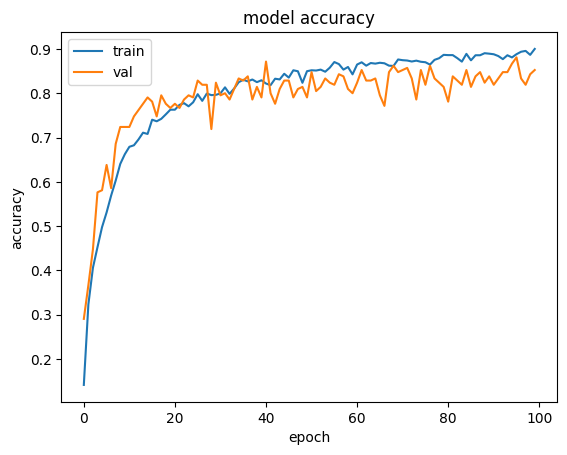

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

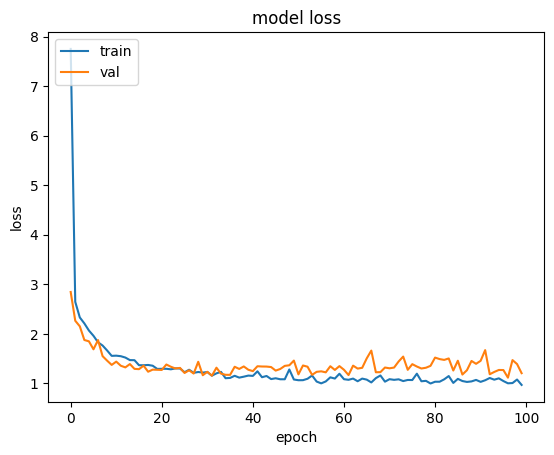

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 20ms/step - loss: 0.9989 - accuracy: 0.8857


[0.9989194869995117, 0.8857142925262451]

In [ ]:
out222 = model.predict(X_test)
out321 = [np.argmax(out222[i]) for i in range(210)]
label_test = [np.argmax(Y_test[i]) for i in range(210)]

7/7 [==============================] - 0s 17ms/step


 Test Images on which model predictions are wrong. 

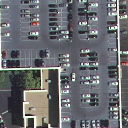

predicted: intersection v/s actual: parkinglot , 1


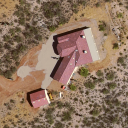

predicted: denseresidential v/s actual: sparseresidential , 22


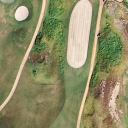

predicted: baseballdiamond v/s actual: golfcourse , 26


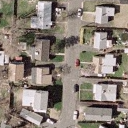

predicted: denseresidential v/s actual: mediumresidential , 35


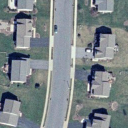

predicted: denseresidential v/s actual: mediumresidential , 37


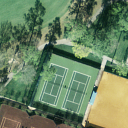

predicted: sparseresidential v/s actual: tenniscourt , 40


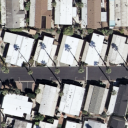

predicted: buildings v/s actual: mobilehomepark , 42


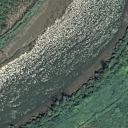

predicted: forest v/s actual: river , 45


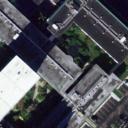

predicted: overpass v/s actual: buildings , 51


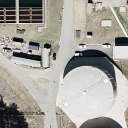

predicted: buildings v/s actual: storagetanks , 52


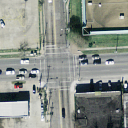

predicted: overpass v/s actual: intersection , 58


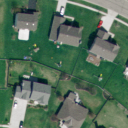

predicted: sparseresidential v/s actual: mediumresidential , 67


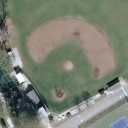

predicted: tenniscourt v/s actual: baseballdiamond , 68


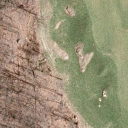

predicted: river v/s actual: golfcourse , 80


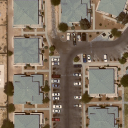

predicted: mediumresidential v/s actual: denseresidential , 86


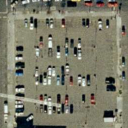

predicted: denseresidential v/s actual: parkinglot , 90


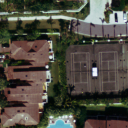

predicted: intersection v/s actual: tenniscourt , 99


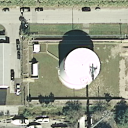

predicted: buildings v/s actual: storagetanks , 112


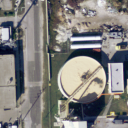

predicted: buildings v/s actual: storagetanks , 115


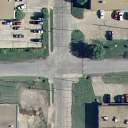

predicted: tenniscourt v/s actual: intersection , 138


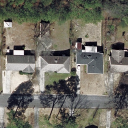

predicted: sparseresidential v/s actual: mediumresidential , 140


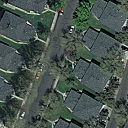

predicted: intersection v/s actual: denseresidential , 147


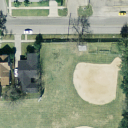

predicted: tenniscourt v/s actual: baseballdiamond , 167


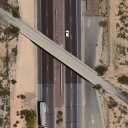

predicted: overpass v/s actual: intersection , 196


In [ ]:
for i in range(210):
  if (label_test[i] != out321[i]):
    pil_img = tf.keras.utils.array_to_img(X_test[i])
    pil_img.show()
    print(f"predicted: {_LABELS[out321[i]]} v/s actual: {_LABELS[label_test[i]]} , {i}")